In [1]:
%cd "C:\Users\kumar\Documents\Analytics & Data Science_3rd semester\Mittal\COVID-19_Kaggle_Challenge"

C:\Users\kumar\Documents\Analytics & Data Science_3rd semester\Mittal\COVID-19_Kaggle_Challenge


In [40]:
## Import dependencies
import datetime
import numpy as np 
import pandas as pd 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.cluster import KMeans
from nltk import wordpunct_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.stem.porter import PorterStemmer

from scipy import stats
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [142]:
# Choose 5 papers to understand the general structure of peer reviewed articles

In [3]:
All_Journals = pd.read_csv("All_Journals.csv")
All_Journals.head()

,Unnamed: 0,PaperID,Title,Abstract,Body
0,0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
1,1,00340eea543336d54adda18236424de6a5e91c9d,Analysis Title: Regaining perspective on SARS-...,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co..."
2,2,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,NaN,The 2019-nCoV epidemic has spread across China...
3,3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
4,4,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...


In [29]:
# # Dropping Null values
# All_Journals.dropna(inplace=True)
# All_Journals.info()

In [4]:
# List of special characters
import string
print("----------------------------")
print("list of special characters")
print(string.punctuation)

# Remove punctuation & special characters from journals file
All_Journals['Body'] = All_Journals['Body'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

----------------------------
list of special characters
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
# Drop all columns except body
Bodydf = All_Journals.drop(["PaperID", "Abstract", "Title"], axis=1)
Bodydf.head(5)


,Unnamed: 0,Body
0,0,VP3 and VP0 which is further processed to VP2 ...
1,1,In December 2019 a novel coronavirus SARSCoV2 ...
2,2,The 2019nCoV epidemic has spread across China ...
3,3,Infectious bronchitis IB which is caused by in...
4,4,Nipah is an infectious negativesense singlestr...


In [9]:
#Search Engine

start = datetime.datetime.now()

NLTKwords = input("Search: ")

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

NLTKwords = NLTKwords.strip()
NLTKwords = stemmer.stem(NLTKwords)
NLTKwords = NLTKwords.lower().split(' ')


Filter_NLTKwords = []
for word in NLTKwords:
    if word not in stop_words:
        Filter_NLTKwords.append(word)    
        
string = ""
for word in Filter_NLTKwords:
    word = word + " "
    string = string + word

string = string.strip()

word_count = []
drops = []

for i, j in enumerate(Bodydf.Body):
    j = j.lower()
    j = j.strip()
    j = stemmer.stem(j)
    z = 0
    for k in Filter_NLTKwords:
        x = re.findall(k, j)
        for word in x:
            if x != '':
                z = z +1
    if z > 0:
        word_count.append(z)
        drops.append(True)
    else:
        drops.append(False)
        
print(datetime.datetime.now() - start)

df1 = Bodydf[drops]
df1['word_counts'] = word_count
print("Searched for {} rows".format(df1.shape[0]))
df1.sort_values('word_counts', ascending = False)

Search: wuhan
0:06:58.442607
Your search has returned 1124 rows


C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,Body,word_counts
306,306,As of 3rd March 2020 90870 cases and 3112 deat...,59
5,5,In December 2019 a cluster of patients with pn...,57
668,668,The emergence of a novel coronavirus SARSCoV2 ...,55
204,204,The novel coronavirus first detected in Wuhan...,54
871,871,history and timelines of reporting changes to ...,54
...,...,...,...
336,336,The study is a Multicenter Crosssection Study ...,1
12420,12420,A novel coronavirus 2019nCoV has been identifi...,1
11925,11925,infection COVID19 that started in Wuhan Hubei ...,1
962,962,Following its onset in Wuhan China the pandemi...,1


In [10]:
# def lower_case(input_str):
#     input_str = input_str.lower()
#     return input_str

print(df1.shape)
df1.head()

(1124, 3)


,Unnamed: 0,Body,word_counts
1,1,In December 2019 a novel coronavirus SARSCoV2 ...,24
2,2,The 2019nCoV epidemic has spread across China ...,9
5,5,In December 2019 a cluster of patients with pn...,57
11,11,Despite its humble origins as a cluster of cas...,1
14,14,Since the beginning of 2020 a surging number o...,1


In [11]:
#Create DTM
start = datetime.datetime.now()

import nltk
from nltk import wordpunct_tokenize          
from nltk.stem.porter import PorterStemmer

# stop words
en_stop = stopwords.words('english')

# stemming words
stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

#tokenize
def tokenize(text):
    tokens = nltk.word_tokenize(text.lower())
    stems = stem_tokens(tokens, stemmer)
    return stems

# tokenize stems and tokenizes altogether
searched_list = df1.Body.to_list()

vect = CountVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,2),max_features = 2000)

vect.fit(searched_list)

dtm = vect.transform(searched_list)

df2 = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())

print(datetime.datetime.now() - start)


C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


0:06:33.828860


In [12]:
## use TfidfTransformer on the frequency term DTM
from sklearn.feature_extraction.text import TfidfTransformer


## Below uses l2 normalization as default, use_idf default is True
tfdif = TfidfTransformer()
dtm2 = tfdif.fit_transform(dtm)

tfdif_df = pd.DataFrame(dtm2.toarray(), columns=vect.get_feature_names())


In [96]:
tfdif_df.head()

,0,0001,001,005,01,02,05,1,1 2,1 ],...,wuhan china,wuhan citi,wuhan hubei,x,year,year old,yet,yield,young,zoonot
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.039628,0.000000,0.0,...,0.007956,0.000000,0.000000,0.0,0.000000,0.0,0.009587,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.034715,0.035079,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.016879,0.0,0.0,0.0,0.0,0.000000,0.022855,0.005745,0.0,...,0.000000,0.051558,0.013025,0.0,0.029552,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.011017,0.038868,0.000000,0.0,...,0.007804,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.022486,0.016955,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [97]:
# -----------------------------------------
# Standardizing the numeric dataset
# -----------------------------------------

scaler = StandardScaler()
std_df = scaler.fit_transform(tfdif_df)
type(std_df)

std_df.shape

(1124, 2000)

In [98]:
from sklearn.decomposition import PCA

# Choosing the amount of variance explained
pca = PCA(0.90)
pca.fit(std_df)

# Number of components it will take to fit the above variance explained
pca.n_components_

563

In [99]:
# Extracting the matrix of PCs from the above run

pca_components = pca.transform(std_df)
pca_components.shape
pca_components.view()
# type(pca_components)

array([[-5.91425568, -7.14267136, -6.93526057, ...,  0.90086462,
        -0.41634229,  1.19342911],
       [-7.19658289,  2.64698313, -8.49844183, ...,  0.69670675,
         0.25028093,  0.91084898],
       [-8.25812624, -2.03869332, -6.35328181, ..., -0.04414837,
        -0.01690303,  0.54410649],
       ...,
       [ 7.789888  ,  3.9762927 , -3.14881331, ..., -0.41808392,
         0.66973428,  0.30811483],
       [ 0.21380692, -4.48892277, -3.31720664, ..., -0.22423569,
         0.01164013, -0.04773587],
       [-6.49131608, 10.02302726, -4.63699805, ...,  0.92248749,
         0.07370546, -0.09940007]])

In [100]:
# resetting index and saving the index as a column
tfdif_df["index"] = tfdif_df.index
df3 =tfdif_df.reset_index()
df3

,level_0,0,0001,001,005,01,02,05,1,1 2,...,wuhan china,wuhan citi,wuhan hubei,x,year,year old,yet,yield,young,zoonot
0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.039628,0.000000,...,0.007956,0.000000,0.000000,0.0,0.000000,0.0,0.009587,0.000000,0.0,0.000000
1,1,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.034715,0.035079,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,2,0.000000,0.016879,0.0,0.000000,0.0,0.0,0.000000,0.022855,0.005745,...,0.000000,0.051558,0.013025,0.0,0.029552,0.0,0.000000,0.000000,0.0,0.000000
3,3,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.011017,0.038868,0.000000,...,0.007804,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,4,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.022486,0.016955,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,1119,0.006695,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.014033,0.007936,...,0.006339,0.000000,0.000000,0.0,0.011664,0.0,0.007638,0.090361,0.0,0.009772
1120,1120,0.000000,0.000000,0.0,0.013535,0.0,0.0,0.000000,0.120530,0.000000,...,0.021779,0.000000,0.015455,0.0,0.030056,0.0,0.013121,0.000000,0.0,0.050362
1121,1121,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.005928,0.006705,...,0.000000,0.000000,0.000000,0.0,0.009855,0.0,0.006453,0.000000,0.0,0.008256
1122,1122,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.010822,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [102]:
from sklearn.decomposition import SparsePCA

start = datetime.datetime.now()
        

sparsepca=SparsePCA(n_components=2)
sparse_pca_components = sparsepca.fit_transform(std_df)

print(datetime.datetime.now() - start)


0:00:51.809490


In [103]:
cols = []
for i in range(1,12):
    cols.append("PC"+str(i))
    
print(cols)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']


In [104]:

cols = []
for i in range(1,564):
    cols.append("PC"+str(i))
    
# print(cols)

PCdf = pd.DataFrame(pca_components, columns = cols)
PCdf



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC554,PC555,PC556,PC557,PC558,PC559,PC560,PC561,PC562,PC563
0,-5.914256,-7.142671,-6.935261,-3.986354,4.457673,1.054711,5.151756,3.547557,9.757974,-2.712988,...,-0.001666,-0.062916,-1.222778,-1.186687,-0.997369,0.614490,0.319266,0.900865,-0.416342,1.193429
1,-7.196583,2.646983,-8.498442,-0.147945,-5.501283,-0.416139,0.095961,-2.280623,-3.048383,0.876937,...,1.817846,-0.011775,-0.933549,1.054133,-0.105331,-1.066660,-0.346037,0.696707,0.250281,0.910849
2,-8.258126,-2.038693,-6.353282,5.542970,0.658562,0.347407,0.662403,2.263388,3.556460,-0.928212,...,-0.270361,0.154383,-1.267825,-0.105444,-0.898213,0.968114,1.248903,-0.044148,-0.016903,0.544106
3,-9.481425,-5.185006,-3.612637,2.081746,-2.120201,1.417394,0.942915,1.581789,6.366765,-2.029679,...,0.065319,0.398822,-0.780574,1.177616,1.500594,-0.389811,1.567482,-0.118211,0.848380,1.848925
4,-2.370888,-13.430490,0.700497,-5.422861,3.122290,5.088994,-3.091482,-7.864058,1.906826,-2.293592,...,1.065256,-0.861486,-0.478246,-1.080903,0.543438,-0.047939,0.603168,0.870776,0.428651,0.382580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,-5.490661,-1.316129,-9.008843,3.108734,-3.142103,-7.264421,2.298887,0.350450,-6.984699,2.176583,...,0.075711,-1.369967,-0.570703,0.136843,0.062906,-0.282970,0.075129,-0.325305,-0.160366,-0.154759
1120,-5.947097,15.357110,10.986494,-0.110650,3.374240,-7.787172,0.188786,-1.302192,1.044833,-7.896762,...,-0.505120,0.360995,0.414642,0.400405,0.240228,0.120285,0.324291,0.163667,-0.498584,-0.669797
1121,7.789888,3.976293,-3.148813,-8.769699,8.225699,4.811446,-2.765225,3.497846,-4.552837,-0.491079,...,0.741762,1.267287,-0.136502,-0.352363,0.536128,-0.090888,0.448259,-0.418084,0.669734,0.308115
1122,0.213807,-4.488923,-3.317207,-6.273614,-3.480997,-4.134280,-11.733831,1.899440,-0.557406,8.893053,...,-0.108221,0.055948,-0.059985,-0.148220,-0.238306,-0.178230,-0.321256,-0.224236,0.011640,-0.047736


In [141]:
# SparsePCA dataframe
cols = []
for i in range (1, 3):
    cols.append("SparsePC" + str(i))

SparsePCdf= pd.DataFrame(sparse_pca_components, columns = cols)
SparsePCdf


,SparsePC1,SparsePC2
0,-5.602141,7.450272
1,-7.332612,-3.541906
2,-8.099436,1.524632
3,-9.012668,4.908921
4,-1.745010,13.979023
...,...,...
1119,-5.402025,-0.321006
1120,-6.644818,-14.970814
1121,6.957293,-2.723665
1122,0.114008,3.301425


In [117]:
# Choose number of clusters (remember k is a hyperparameter and several renditions of the below could be run in a for loop )
list=[]
# Number of clusters
kmeans = KMeans(n_clusters=9)
# Fitting the input data
kmeans = kmeans.fit(SparsePCdf)
labelPCdf = kmeans.labels_
list.append(labelPCdf)
# Coordinates of cluster centers
centroids = kmeans.cluster_centers_
# centroids.shape
centroids

array([[ -6.72843401, -12.97395914,   2.18018018],
       [ -7.3879367 ,   4.56690158,   3.13286713],
       [ 18.51640914,   2.25959728,   5.56435644],
       [ -3.99119278,  -1.61078369,   3.97560976],
       [ -5.52133777,  10.25152792,   2.        ],
       [  3.40024353,  -3.5554016 ,   1.78703704],
       [ 12.38778271,   1.41020307,   4.76724138],
       [ -4.65432567,  -7.06983956,   3.15037594],
       [  2.27499961,   4.60810666,   1.54545455]])

In [118]:
# Printing centroids and frequency distribution of cluster labels

centroids[:,0]
stats.itemfreq(labelPCdf)

C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([[  0, 111],
       [  1, 143],
       [  2, 101],
       [  3, 164],
       [  4, 149],
       [  5, 108],
       [  6, 116],
       [  7, 133],
       [  8,  99]], dtype=int64)

In [119]:
SparsePCdf["Clusters"] = list[0]
SparsePCdf

,SparsePC1,SparsePC2,Clusters
0,-5.602141,7.450272,4
1,-7.332612,-3.541906,3
2,-8.099436,1.524632,1
3,-9.012668,4.908921,1
4,-1.745010,13.979023,4
...,...,...,...
1119,-5.402025,-0.321006,3
1120,-6.644818,-14.970814,0
1121,6.957293,-2.723665,5
1122,0.114008,3.301425,8


In [80]:
# EllipticEnvelope uses Mahalanobis distance 
from sklearn.covariance import EllipticEnvelope
# from sklearn.ensemble import IsolationForest
# from sklearn.neighbors import LocalOutlierFactor


outlier_frac = 0.035 #Fraction of outiers

ell = EllipticEnvelope(contamination=outlier_frac)
ell.fit(PCdf)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-9684.910861450622178 > -9694.840623499796493). You may want to try with a higher value of support_fraction (current value: 0.751).
  RuntimeWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-9704.647468764876976 > -9712.071634874038864). You may want to try with a higher value of support_fraction (current value: 0.751).
  RuntimeWarning)
C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\covariance\_robust_covariance.py:170: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-9685.928990271133443 > -9692.734790536966102). You may want to try with a higher value of support_fraction (current value: 0.751).
  RuntimeW

EllipticEnvelope(assume_centered=False, contamination=0.035, random_state=None,
                 store_precision=True, support_fraction=None)

In [86]:
# Checking for the number of outliers

pred = ell.predict(PCdf)
print(sum(pred == -1) ) # Outlier points are predicted as -1
stats.itemfreq(pred)

pred

40


C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  import sys


array([1, 1, 1, ..., 1, 1, 1])

In [116]:
PCdf["Clusters"] = list[0]

# PCdf2[PCdf2["Clusters"]==1]
PCdf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC555,PC556,PC557,PC558,PC559,PC560,PC561,PC562,PC563,Clusters
0,-5.914256,-7.142671,-6.935261,-3.986354,4.457673,1.054711,5.151756,3.547557,9.757974,-2.712988,...,-0.062916,-1.222778,-1.186687,-0.997369,0.614490,0.319266,0.900865,-0.416342,1.193429,4
1,-7.196583,2.646983,-8.498442,-0.147945,-5.501283,-0.416139,0.095961,-2.280623,-3.048383,0.876937,...,-0.011775,-0.933549,1.054133,-0.105331,-1.066660,-0.346037,0.696707,0.250281,0.910849,3
2,-8.258126,-2.038693,-6.353282,5.542970,0.658562,0.347407,0.662403,2.263388,3.556460,-0.928212,...,0.154383,-1.267825,-0.105444,-0.898213,0.968114,1.248903,-0.044148,-0.016903,0.544106,3
3,-9.481425,-5.185006,-3.612637,2.081746,-2.120201,1.417394,0.942915,1.581789,6.366765,-2.029679,...,0.398822,-0.780574,1.177616,1.500594,-0.389811,1.567482,-0.118211,0.848380,1.848925,4
4,-2.370888,-13.430490,0.700497,-5.422861,3.122290,5.088994,-3.091482,-7.864058,1.906826,-2.293592,...,-0.861486,-0.478246,-1.080903,0.543438,-0.047939,0.603168,0.870776,0.428651,0.382580,0


Text(0, 0.5, 'SparsePC2')

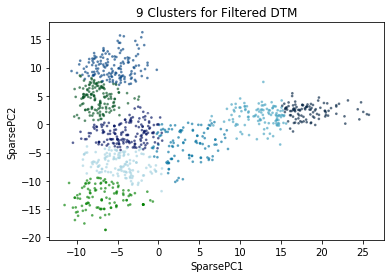

In [133]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.scatter(SparsePCdf.iloc[:,0], SparsePCdf.iloc[:,1], c = list[0], cmap='ocean', alpha=0.5, s=3)  
plt.title(str(len(set(list[0]))) + " Clusters for Filtered DTM", fontsize=12)
plt.xlabel("SparsePC1")
plt.ylabel("SparsePC2")